In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/macintosh/Library/Python/3.9/lib/python/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the Data #

In [3]:
train = pd.read_csv('./train.csv', index_col='id')
test = pd.read_csv('./test.csv', index_col='id')

In [4]:
train

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8


In [5]:
test

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
id,,,,,,,,,,,
10407,884.0,121.420000,35.360000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459
10408,90.0,9.931960,18.000000,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194
10409,116.0,7.767992,11.600000,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834
10410,100.0,9.107996,10.000000,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466
10411,55.0,4.030000,11.000000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456
...,...,...,...,...,...,...,...,...,...,...,...
17341,446.0,36.135392,9.636364,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548
17342,36.0,3.550000,18.000000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045
17343,68.0,4.545328,11.333333,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


## Check for Null data ##

In [7]:
test.isnull().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

## Check for duplicated data ##

In [8]:
train.duplicated().sum()

0

# Overview of the training data # 

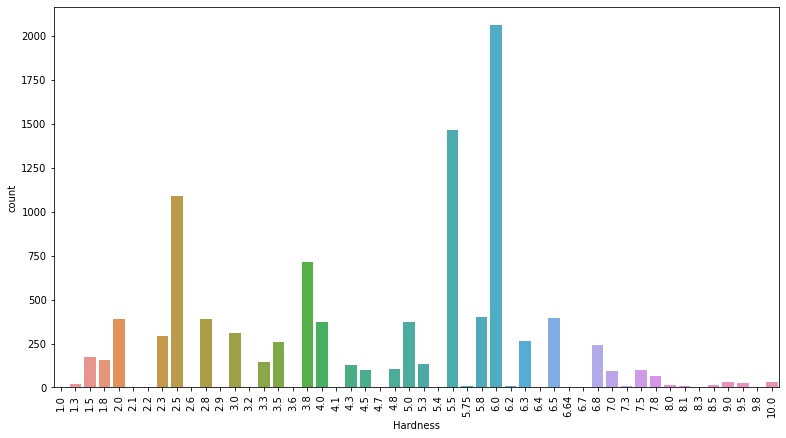

In [9]:
plt.figure(figsize=(13,7))
sns.countplot(data=train, x='Hardness')
plt.xticks(rotation=90);

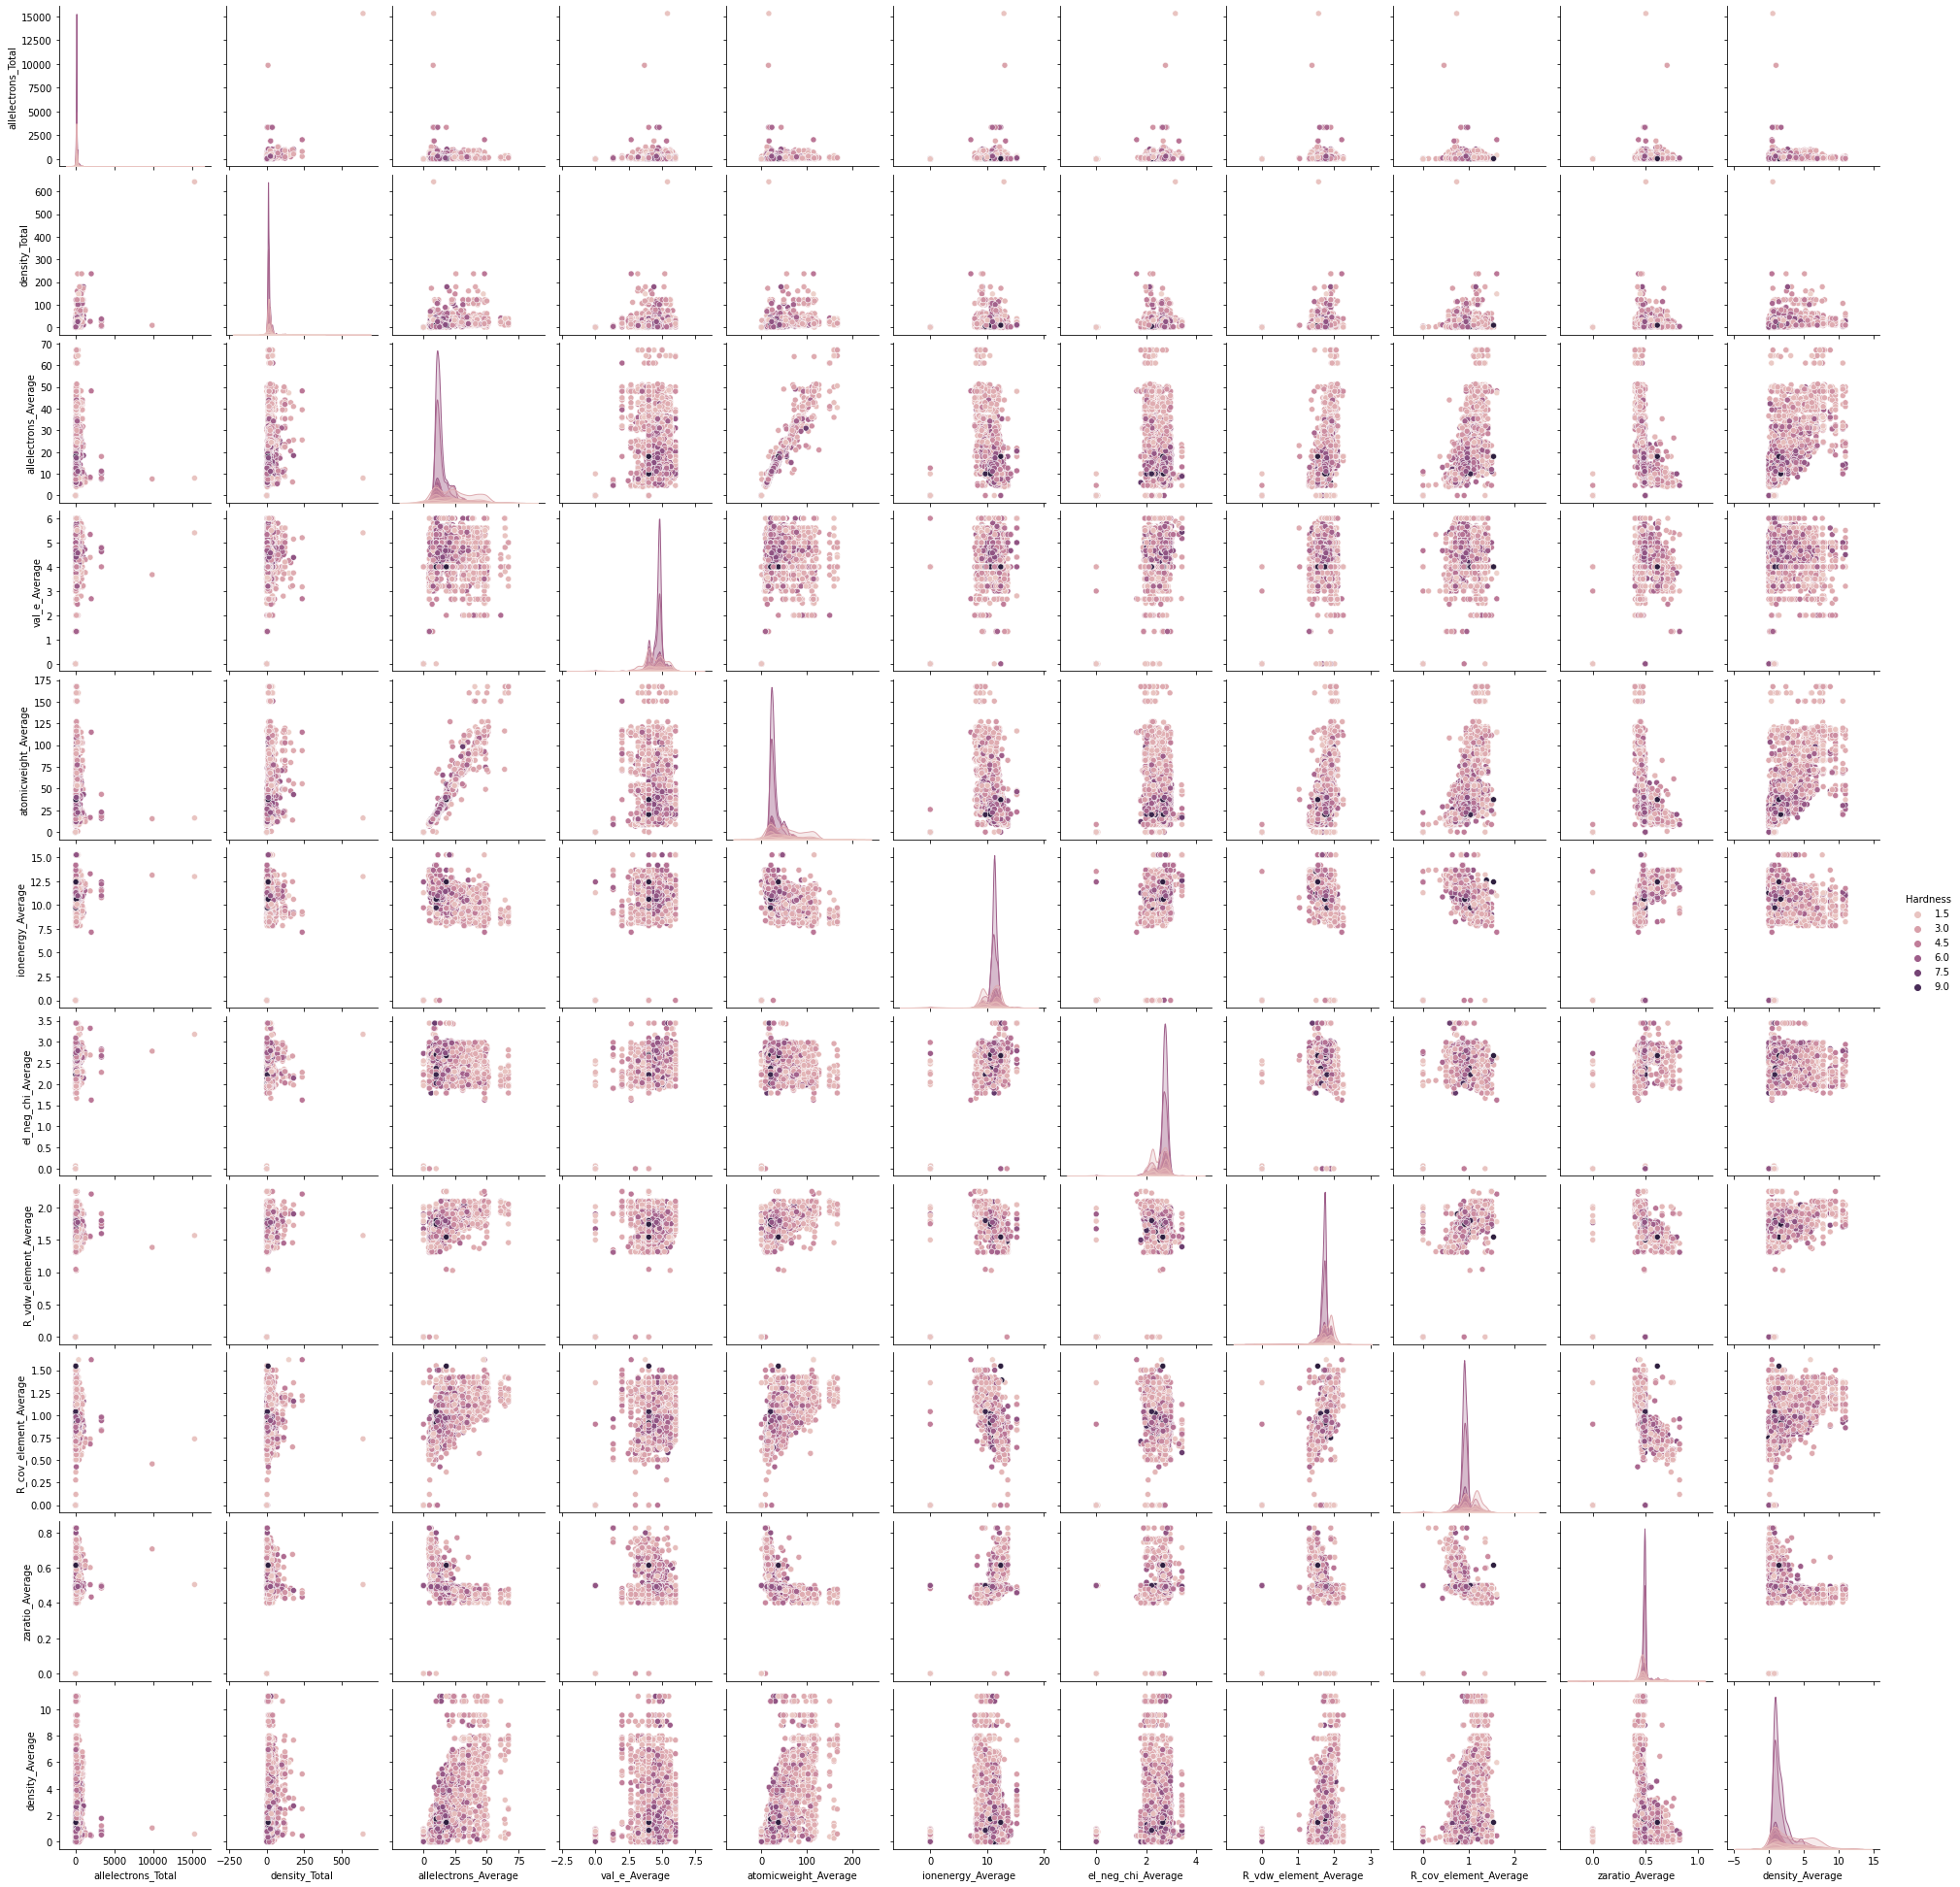

In [10]:
sns.pairplot(data=train, hue='Hardness')

<AxesSubplot:>

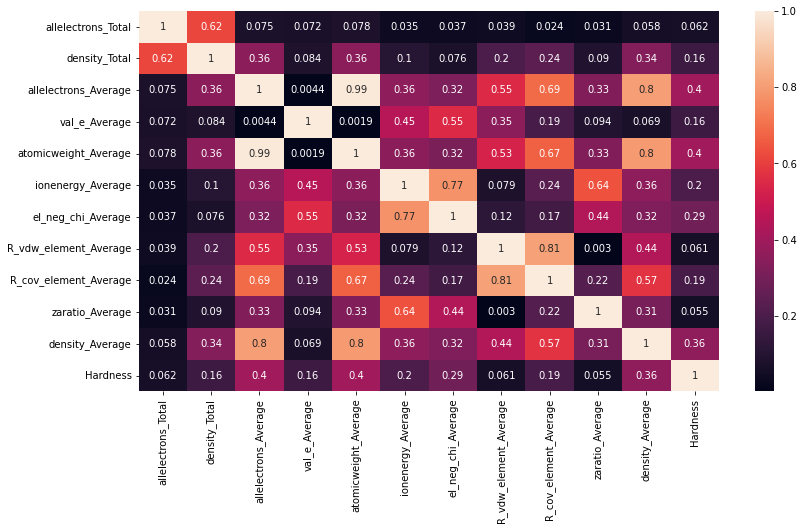

In [10]:
plt.figure(figsize=(13,7))
sns.heatmap(data=train.corr().abs(), annot=True)

<AxesSubplot:xlabel='atomicweight_Average', ylabel='allelectrons_Average'>

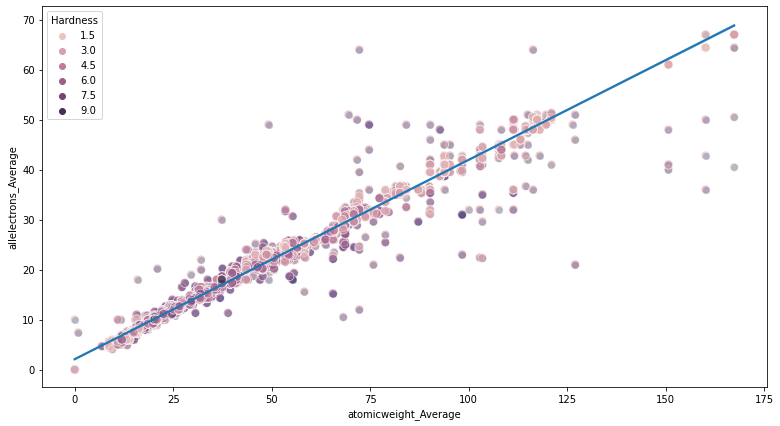

In [11]:
plt.figure(figsize=(13,7))
sns.regplot(data=train, x='atomicweight_Average', y='allelectrons_Average')
sns.scatterplot(data=train, x='atomicweight_Average', y='allelectrons_Average', hue='Hardness',s=80, alpha=.7)


Now we observe that the features 'atomicwieght_Average' and 'allelectrons_Average' are strongly correlated, thus we will get rid of one of them. 

In [12]:
train = train.drop('allelectrons_Average', axis=1)
test = test.drop('allelectrons_Average', axis=1)

# Analizing possible outliers #

We will go through each column from the pairplot result, since we can identifyy possible outliers in our dataset

<AxesSubplot:xlabel='allelectrons_Total', ylabel='density_Average'>

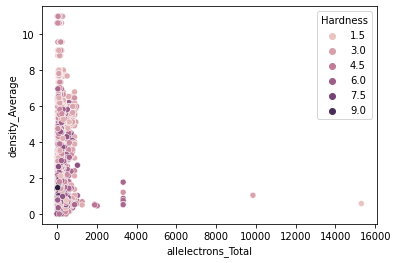

In [13]:
sns.scatterplot(data=train, x='allelectrons_Total', y='density_Average', hue='Hardness')

In [14]:
train[train.allelectrons_Total > 1500]

,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,
65,1894.0,25.021992,4.388889,16.210699,11.467522,2.688333,1.544444,0.735556,0.601609,0.54957,2.5
774,9852.0,8.511159,3.676768,15.374870,13.123610,2.780505,1.385051,0.458788,0.706986,1.04032,2.8
871,3328.0,4.907327,4.666667,20.027353,11.614333,2.817333,1.705000,0.980000,0.491673,0.86724,5.5
1423,3328.0,4.243996,4.800000,15.693100,12.415840,2.828000,1.598000,0.836000,0.499196,0.75193,5.5
2597,3328.0,25.494000,4.800000,43.498522,10.759120,2.279000,1.907200,0.946000,0.485063,1.20466,3.5
3072,2024.2,236.459656,2.681514,114.951853,7.146097,1.622865,2.209848,1.615840,0.434283,0.45291,4.7
4629,3328.0,36.136971,4.625000,22.206043,12.184250,2.640625,1.787813,0.940000,0.493379,1.76740,5.5
5280,3328.0,7.442831,4.000000,17.790357,11.475770,2.799000,1.750000,0.828000,0.499680,0.53914,4.0
5493,15300.0,643.093804,5.401274,16.215127,12.976603,3.179236,1.567945,0.737260,0.505030,0.58105,1.5


In [15]:
train = train.drop(list(train[train.allelectrons_Total > 1500].index))

<AxesSubplot:xlabel='val_e_Average', ylabel='zaratio_Average'>

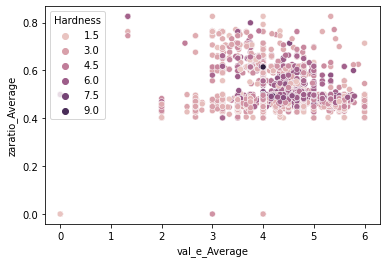

In [16]:
sns.scatterplot(data=train, x='val_e_Average', y='zaratio_Average', hue='Hardness')

In [17]:
train[(train.zaratio_Average < 0.1) & (train.val_e_Average > 2)]

,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,
99,42.0,0.0000,4.0,0.000000,0.026725,2.727,1.767,0.0,0.0,0.80212,6.0
3077,0.0,0.0000,4.0,0.000000,0.000000,0.000,0.000,0.0,0.0,0.59255,1.5
3276,4.0,0.0000,3.0,8.773227,13.512520,0.000,0.000,0.0,0.0,0.00000,3.5
4881,0.0,0.0000,4.0,0.000000,0.000000,0.000,0.000,0.0,0.0,0.86724,1.5
8815,0.0,0.0000,4.0,0.000000,0.000000,0.000,1.990,0.0,0.0,0.00000,1.5
9650,0.0,0.0775,4.0,0.000000,0.000000,2.240,0.000,0.0,0.0,0.07675,2.5


In [18]:
train = train.drop(list(train[(train.zaratio_Average < 0.1) & (train.val_e_Average > 2)].index))

<AxesSubplot:xlabel='val_e_Average', ylabel='R_vdw_element_Average'>

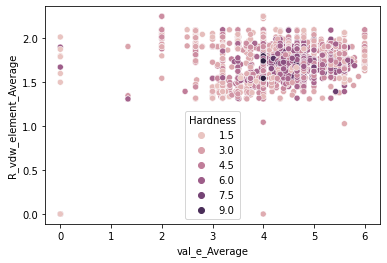

In [19]:
sns.scatterplot(data=train, x='val_e_Average', y='R_vdw_element_Average', hue='Hardness')

In [20]:
train[ (train.R_vdw_element_Average > 1.0 ) & ( train.val_e_Average < 1 ) ]

,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,
584,0.0,0.000000,0.0,0.0,0.00000,1.990000,2.0150,0.0,0.000000,0.00000,1.5
1987,0.0,0.000000,0.0,0.0,0.00000,0.000000,1.8000,0.0,0.498970,0.00000,1.5
4500,0.0,0.000000,0.0,0.0,0.00000,0.000000,1.9000,0.0,0.499010,0.00000,6.0
5641,0.0,0.133984,0.0,0.0,12.41584,0.000000,1.6725,0.0,0.499404,0.13389,6.0
5881,0.0,0.007000,0.0,0.0,11.28095,1.966667,1.6000,0.0,0.000000,0.00000,1.5
7263,0.0,0.000000,0.0,0.0,0.00000,2.530000,1.8750,0.0,0.000000,0.02220,1.5
8058,0.0,0.000000,0.0,0.0,0.00000,0.000000,1.7900,0.0,0.000000,0.00000,1.5
10153,0.0,0.000000,0.0,0.0,0.00000,0.000000,1.5000,0.0,0.000000,0.00000,1.5


In [21]:
train = train.drop(list(train[ (train.R_vdw_element_Average > 1.0 ) & ( train.val_e_Average < 1 ) ].index))

<AxesSubplot:xlabel='ionenergy_Average', ylabel='R_cov_element_Average'>

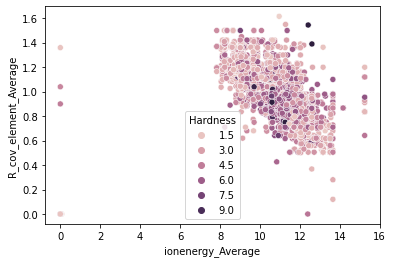

In [22]:
sns.scatterplot(data=train, x='ionenergy_Average', y='R_cov_element_Average', hue='Hardness')

In [23]:
train[ (train.R_cov_element_Average < 0.5 ) & ( train.ionenergy_Average > 6 ) ]

,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,
692,20.0,2.008328,5.333333,10.612526,13.652933,2.086667,1.318667,0.28000,0.825990,0.27146,2.5
4352,40.0,1.740168,3.000000,8.773227,13.652933,2.073333,1.446667,0.12000,0.825990,0.11391,2.0
5796,36.0,11.463996,3.000000,15.968774,12.593990,2.368000,1.390909,0.36800,0.745029,0.36822,2.0
9817,94.0,10.065992,4.666667,29.159414,10.838333,2.518000,1.318667,0.42632,0.426920,1.04032,5.5
10237,30.0,4.542664,4.666667,22.521872,12.392110,2.766667,1.625000,0.00000,0.499074,1.02048,4.8


In [24]:
train = train.drop(list(train[ (train.R_cov_element_Average < 0.5 ) & ( train.ionenergy_Average > 6 ) ].index))

In [25]:
train.columns

Index(['allelectrons_Total', 'density_Total', 'val_e_Average',
       'atomicweight_Average', 'ionenergy_Average', 'el_neg_chi_Average',
       'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average',
       'density_Average', 'Hardness'],
      dtype='object')

<AxesSubplot:xlabel='el_neg_chi_Average', ylabel='R_cov_element_Average'>

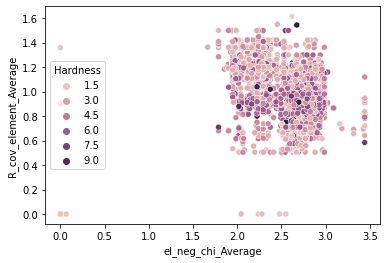

In [26]:
sns.scatterplot(data=train, x='el_neg_chi_Average', y='R_cov_element_Average', hue='Hardness')

In [27]:
train[ (train.R_cov_element_Average < 0.5 ) & ( train.el_neg_chi_Average > 1.5 ) ]

,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,
2747,0.0,0.077500,0.0,0.0,0.0,2.240,0.0,0.0,0.00000,0.07675,1.5
4844,0.0,0.000000,0.0,0.0,0.0,2.045,0.0,0.0,0.49901,0.13266,2.0
6375,0.0,0.000000,0.0,0.0,0.0,2.480,0.0,0.0,0.00000,0.00000,1.5
8477,0.0,0.000000,0.0,0.0,0.0,2.280,0.0,0.0,0.00000,0.00000,2.0
8520,0.0,0.271467,0.0,0.0,0.0,2.550,0.0,0.0,0.00000,0.27146,1.5


In [28]:
train = train.drop(list(train[ (train.R_cov_element_Average < 0.5 ) & ( train.el_neg_chi_Average > 1.5 ) ].index))

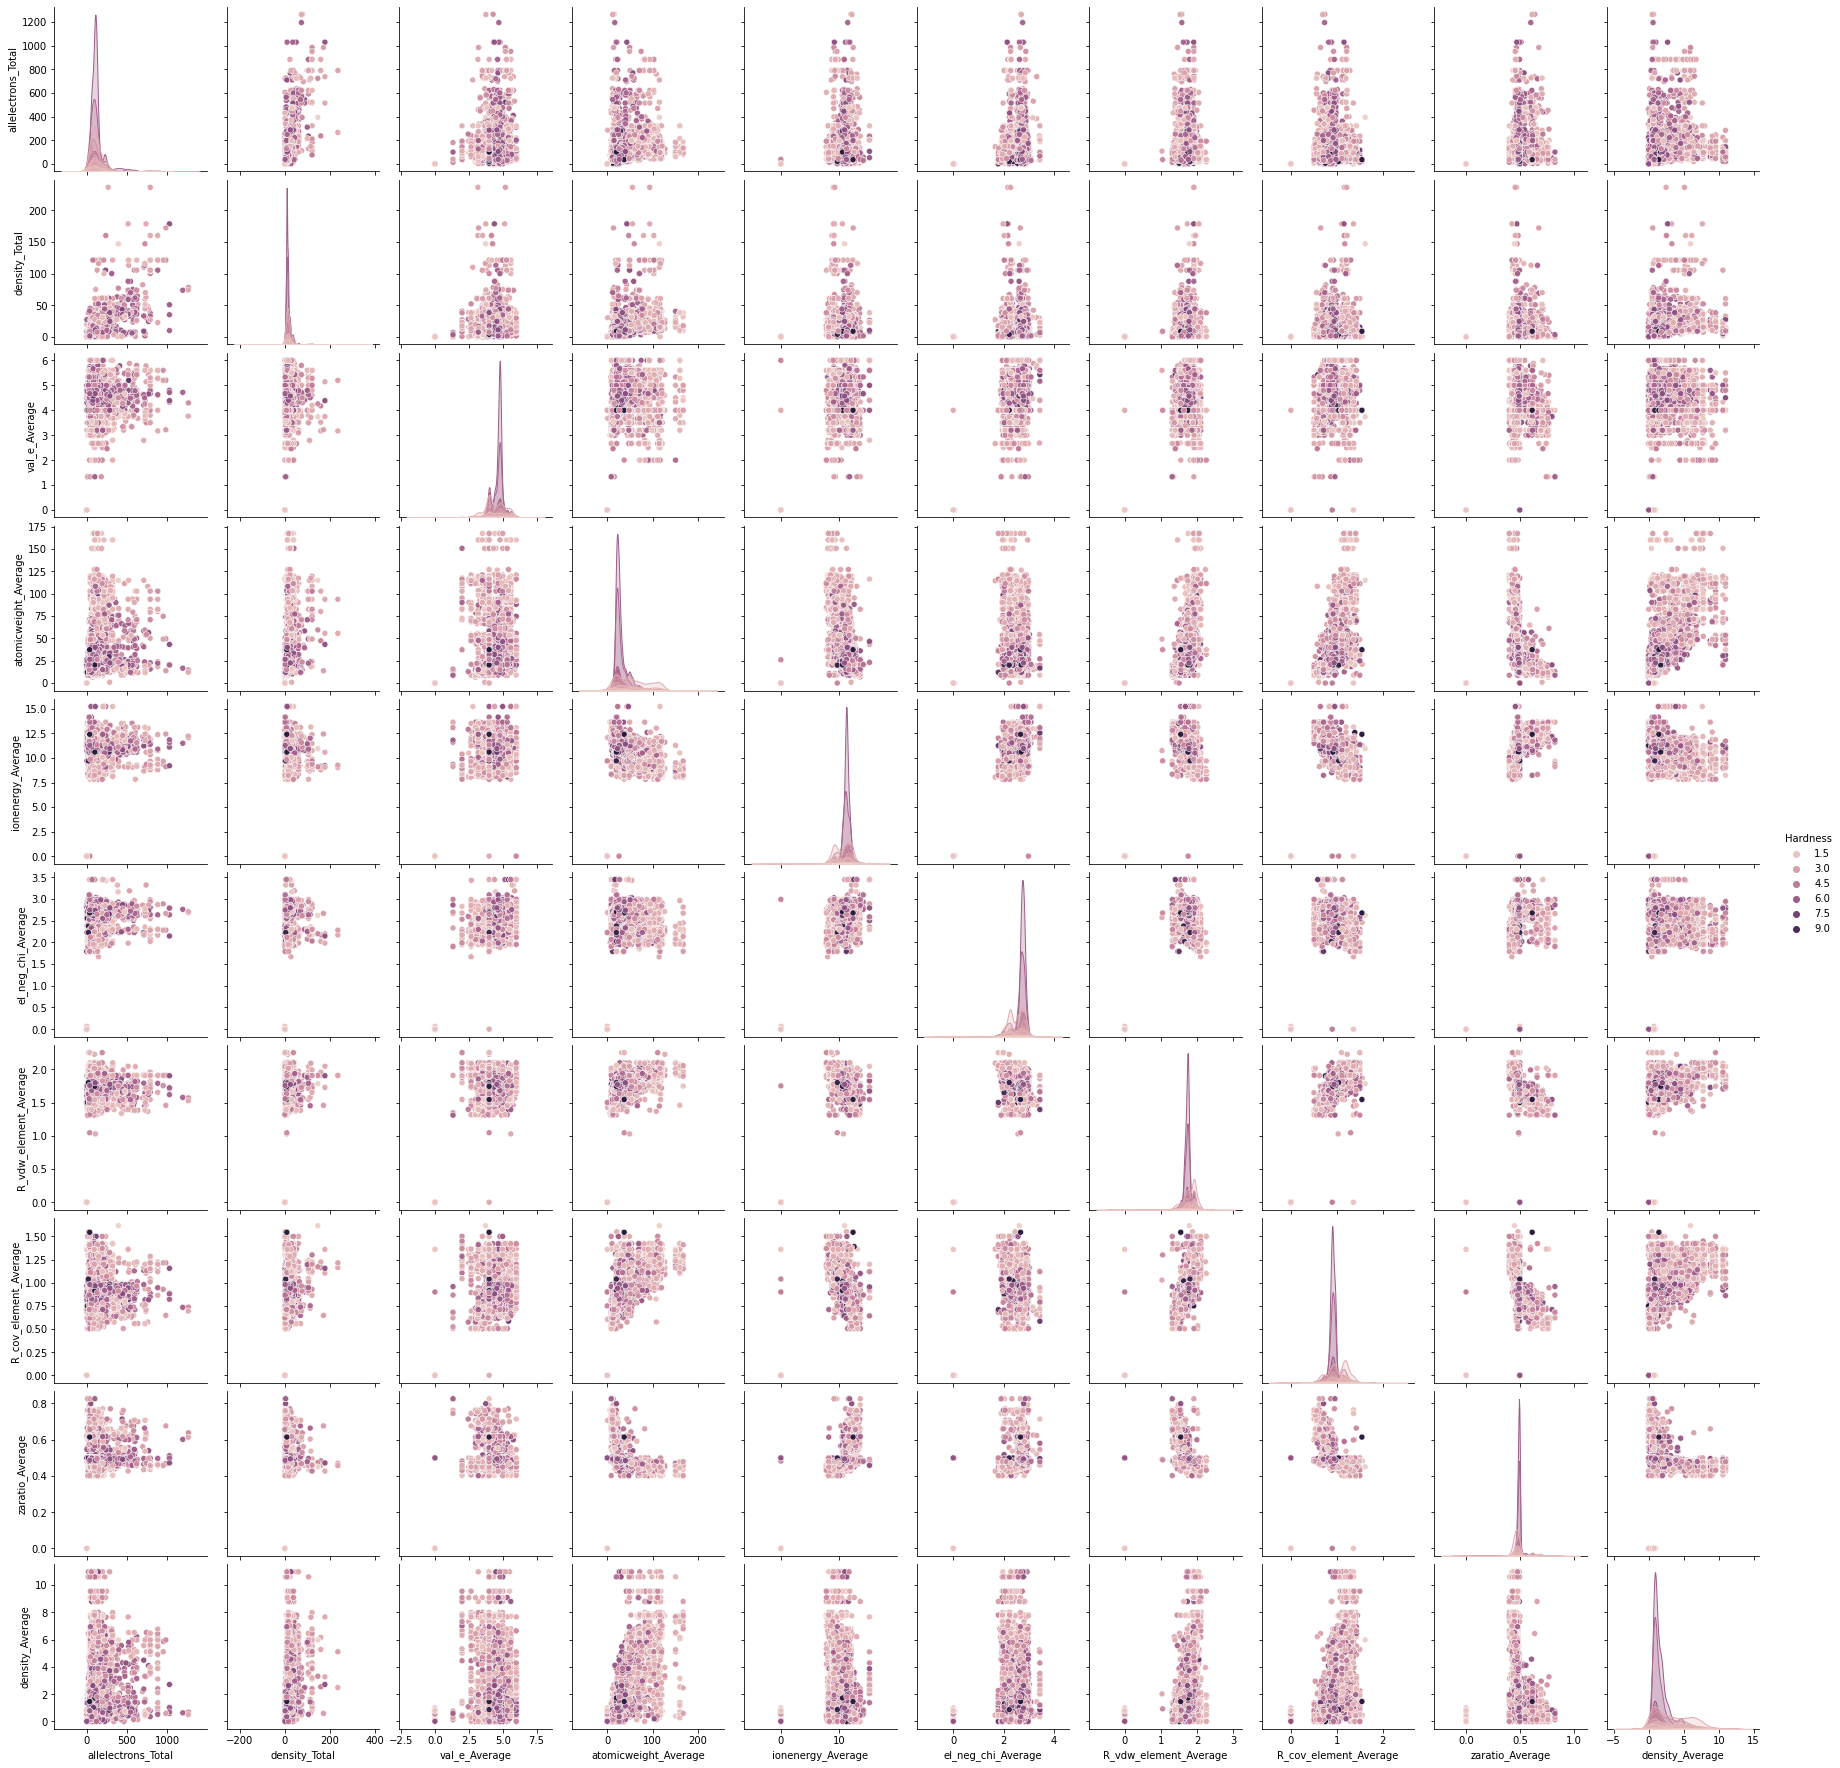

In [33]:
sns.pairplot(data=train, hue='Hardness')

# Test Train Split #

In [29]:
X = train.drop('Hardness', axis=1)
y = train.Hardness

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalizing the data #

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
test_scaled = scaler.transform(test)

# Report of the model #

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

In [34]:
def report(model, X_valid, y_valid):
    pred = model.predict(X_valid)
    print(f' The mean AE is {mean_absolute_error(y_pred=pred, y_true=y_valid)}')
    print(f' The mean SE is {mean_squared_error(y_pred=pred, y_true=y_valid)}')
    print(f' The median SE is {median_absolute_error(y_pred=pred, y_true=y_valid)}')
    return pred;

# Model XGB #

In [35]:
from xgboost import XGBRegressor

In [36]:
model_xgb = XGBRegressor()

In [37]:
model_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
pred_val_xbg = report(model_xgb, X_valid_scaled, y_valid)

 The mean AE is 0.9453882041694113
 The mean SE is 1.6337778519604313
 The median SE is 0.6939944982528687


<AxesSubplot:xlabel='allelectrons_Total', ylabel='Hardness'>

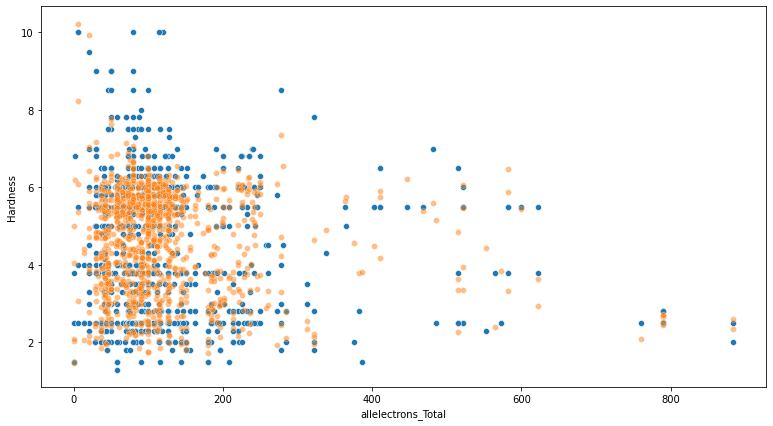

In [39]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=X_valid.allelectrons_Total, y=y_valid)
sns.scatterplot(x=X_valid.allelectrons_Total, y=pred_val_xbg, alpha=0.5)

In [40]:
prediction = model_xgb.predict(test_scaled)

In [41]:
prediction_xbg = pd.DataFrame(data=test)

In [42]:
prediction_xbg['Prediction Hardness'] = prediction
prediction_xbg

,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Prediction Hardness
id,,,,,,,,,,,
10407,884.0,121.420000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459,2.937415
10408,90.0,9.931960,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194,3.079728
10409,116.0,7.767992,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834,6.072408
10410,100.0,9.107996,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466,4.208299
10411,55.0,4.030000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456,4.770137
...,...,...,...,...,...,...,...,...,...,...,...
17341,446.0,36.135392,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548,5.743252
17342,36.0,3.550000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045,4.226823
17343,68.0,4.545328,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425,5.022322


# Model NN #

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

2023-11-22 12:10:16.521916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [60]:
model_nn = Sequential()

model_nn.add(Dense(11, activation='relu'))#, kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))
model_nn.add(BatchNormalization(synchronized=True))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(32, activation='relu'))
#model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
#model_nn.add(Dropout(0.2))
model_nn.add(Dense(1, activation='relu'))

model_nn.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=0)

In [62]:
model_nn.fit(X_train_scaled, y_train,
            epochs = 500,
            validation_data = [X_valid_scaled, y_valid],
            batch_size = 30,
            callbacks = early_stop,
            verbose = 1)

Epoch 1/500


312/312 [==============================] - 2s 3ms/step - loss: 4.5625 - accuracy: 2.1427e-04 - val_loss: 2.6725 - val_accuracy: 0.0000e+00
Epoch 2/500
312/312 [==============================] - 1s 2ms/step - loss: 2.4324 - accuracy: 2.1427e-04 - val_loss: 2.2442 - val_accuracy: 0.0000e+00
Epoch 3/500
312/312 [==============================] - 1s 2ms/step - loss: 2.2150 - accuracy: 2.1427e-04 - val_loss: 2.1228 - val_accuracy: 0.0000e+00
Epoch 4/500
312/312 [==============================] - 0s 2ms/step - loss: 2.0765 - accuracy: 2.1427e-04 - val_loss: 2.0529 - val_accuracy: 0.0000e+00
Epoch 5/500
312/312 [==============================] - 0s 2ms/step - loss: 2.0464 - accuracy: 2.1427e-04 - val_loss: 2.0315 - val_accuracy: 0.0000e+00
Epoch 6/500
312/312 [==============================] - 1s 2ms/step - loss: 1.9573 - accuracy: 2.1427e-04 - val_loss: 2.0408 - val_accuracy: 0.0000e+00
Epoch 7/500
312/312 [==============================] - 1s 2ms/step - loss: 1.9500 - accuracy: 2.1427e-04 -

<AxesSubplot:>

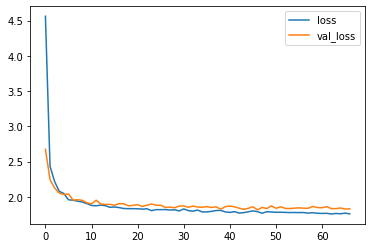

In [63]:
pd.DataFrame(data=model_nn.history.history)[['loss', 'val_loss']].plot()

In [64]:
pred_val_nn = report(model_nn, X_valid_scaled, y_valid)

33/33 [==============================] - 0s 2ms/step
 The mean AE is 1.0368024483351808
 The mean SE is 1.828365372732322
 The median SE is 0.8256797790527344


In [65]:
pred_val_nn.reshape((1038,))

array([5.6369915, 4.865398 , 2.5202591, ..., 5.1513305, 3.5357592,
       4.080848 ], dtype=float32)

<AxesSubplot:xlabel='allelectrons_Total', ylabel='Hardness'>

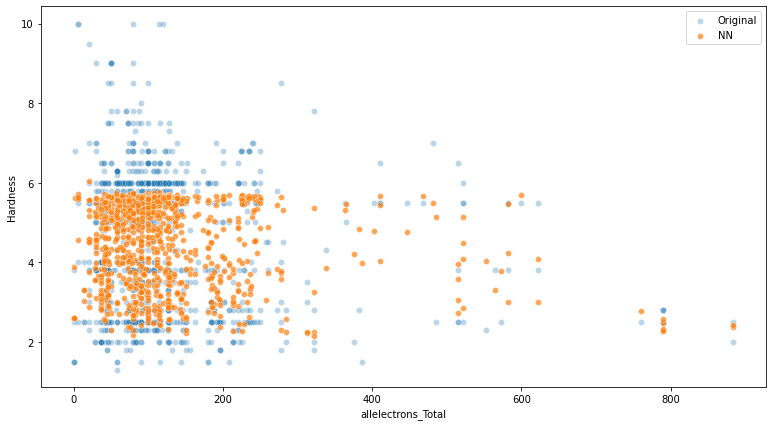

In [66]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=X_valid.allelectrons_Total, y=y_valid, alpha=0.3,label='Original')
sns.scatterplot(x=X_valid.allelectrons_Total, y=pred_val_nn.reshape((1038,)), alpha=0.7, label='NN')
#sns.scatterplot(x=X_valid.allelectrons_Total, y=pred_val_xbg, alpha=0.4, label='XBG')